Привет, Наталья!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех

Все здорово

# Сборный проект "Интернет-магазин компьютерных игр"
## Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



Составим план действий:
1. [ ] Загрузить и изучить данные
1. [ ] Подготовить данные к обработке: 
    -  [ ] Обработать названия столбцов 
    -  [ ] Привести типы данных к нужным 
    -  [ ] Обработать пропуски 
    -  [ ] Подсчитать суммарные продажи во всех регионах 
1. [ ] Провести исследовательский анализ данных:
    -  [ ] Изучить, сколько игр выпускалось в разные годы, сделать выводы о том, важны ли данные за все периоды
    -  [ ] Изучить данные по платформам
    -  [ ] Определить актуальный период для дальнейшего анализа 
    -  [ ] Убрать из учёта данные за прошлые годы 
    -  [ ] Выбрать несколько потенциально прибыльных платформ, основываясь на данных о том, какие платформы лидируют по продажам, растут или падают 
    -  [ ] Построить boxplot по всем продажам и в разрезе по платформам 
    -  [ ] Изучить корреляцию между отзывами и продажами на примере одной платформы
    -  [ ] Соотнести выводы об одной платформе с продажами на других платформах
    -  [ ] Изучить распределение игр по жанрам 
1. [ ] Составить портрет типичного пользователя каждого региона: 
    -  [ ] Изучить самые популярные платформы (топ-5)
    -  [ ] Изучить самые популярные жанры (топ-5)
    -  [ ] Изучить влияет ли рейтинг ESRB на продажи в отдельном регионе
1. [ ] Проверить гипотезы 
    -  [ ] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    -  [ ] Средние пользовательские рейтинги жанров Action и Sports разные.
1. [ ] Сформулировать общий вывод 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хвалю за вступление в проект. Есть подробное описание и информация о данных.
</div 

### Шаг 1. Загрузка данных 

In [39]:
# Импорт библиотек 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [40]:
# Загружаю данные в data 
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информация о данных нами получена. Отлично вышло

По данным видим следующее: 
- есть пропуски: 
    - есть пара пропусков в колонках Name и Genre 
    - есть некоторое количество пропусков в release year 
    - довольно много пропусков в колонках critic_score, user_score, rating. 
- колонки поименованы не совсем в snake_case, стоит привести их к привычному виду 
- год выпуска заведён как float, стоит привести к целому 
- critic score имеет тип данных float, а вот user score - object, попробуем тоже привести его к float. Исходя из описания поля, это должно быть корректно - оценка пользователей (максимум 10) 

### Шаг 2. Подготовка данных к обработке 
На данном шаге разберёмся с явными дубликатами, именами столбцов, типами данных, постараемся обработать пропуски, если это будет возможно 

In [41]:
# ещё раз выведу информацию о столбцах 
data.columns


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [42]:
# и сразу всем скопом переведу в lower case
data.columns = data.columns.str.lower()
# проверяю итог 
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тобой использован отличный метод приведения к нижнему регистру. 

Разбираемся с дубликатами 

In [43]:
print(data.duplicated().sum())

0


Явных дубликатов не найдено, но можно попробовать поискать дублирующиеся строки с одинаковым именем, годом выпуска и платформой. 

In [44]:
display(data.duplicated(['name', 'platform', 'year_of_release']).sum())
display(data[data.duplicated(['name', 'platform', 'year_of_release'])])

2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Видим 2 дубликата - безымянная игра 1993 года для платформы GEN и игра Madden NFL 13 для PS3 2012 года. 
Избавимся от этих строк.

In [45]:
data = data.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])
# проверяем количество пропусков после удаления 
display(data.duplicated(['name', 'platform', 'year_of_release']).sum())
display(data.info())

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
На явные дубли посмотрели и избавились от неявных. 

In [46]:
# приводим год к целому 
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Успех
    
Для экономии вычислительной памяти лучше всего перевести в int32

In [47]:
# обрабатываем оценку пользователей. Можно было бы попытаться привести её к целому, 
# но даже по первым пяти строчкам видим, что значение может быть нецелым 
# data['user_score'] = data['user_score'].astype('float64')

При обработке поля user_score получаем ошибку, вызванную тем, что в поле есть значения 'tbd'. Как правило, это to be done, т.е. оценки в данном случае пока ещё нет. Будет разумно заменить такие поля на NaN, а затем снова попробовать преобразовать тип данных. Код, вызвавший ошибку, пока закомментируем 

In [48]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
# снова пробуем преобразование 
data['user_score'] = data['user_score'].astype('float64')
# выведем информацию о таблице и первые 5 строк 
data.info() 
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изучим пропуски. Начнём со строчки с пустым именем и перейдём к обработке остальных пропусков 

In [49]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для вывода результата необязательно использовать команду diplay() Поскольку код находится в единственной ячейке, то вывод сработает и без нее. 

Для этой игры в целом довольно мало что заполнено, такая строчка мало что может нам дать. Удалим её 

In [50]:
data.drop([659],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


С пропусками в имени разобрались, заодно и убрали пропуск в жанре - проблема была в одной и той же строчке. Пропуски остались в полях 
- год выпуска
- оценка критиков
- оценка пользователей
- рейтинг   

Перейдём к ним

In [51]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропусков. Попробуем восстановить часть - у некоторых игр год выпуска фигурирует в имени, попробуем заполнить год выпуска этим значением. 

In [52]:
# создадим функцию, которая будет вытягивать год выпуска из названия игры 
# для этого потребовалось импортировать библиотеку re для работы с регулярными выражениями
import re
def find_year(name):
    match = re.search(r'\b(19[0-9]{2}|20[0-2][0-4])\b', name)
    if match:
        return int(match.group(0))
    return None
# запишем эти данные в отдельный столбец
data['year_from_name'] = data['name'].apply(find_year).astype('Int64')
# выведем его, где значения не пустые 
display(data[data['year_from_name'].notna()]['year_from_name'])
# заполним год выпуска для тех строк, где он пустой, но мы смогли выцепить его из названия 
data['year_of_release'] = data['year_of_release'].fillna(data['year_from_name'])
# выведем строки с пустым годом релиза после заполнения 
display(data[data['year_of_release'].isna()])
# удалим дополнительный столбец, который добавляли для проставления года 
data.drop('year_from_name', axis=1, inplace=True)
# на всякий случай выведем данные для проверки 
display(data)

183      2004
283      2003
333      2012
359      2014
377      2004
         ... 
16528    2010
16553    2014
16631    2014
16638    2014
16658    2011
Name: year_from_name, Length: 555, dtype: Int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,<NA>
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN,<NA>
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN,<NA>
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,<NA>
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,NaN,E,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.0,0.00,43.0,NaN,E10+,<NA>
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T,<NA>
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M,<NA>
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,NaN,<NA>


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
В целом, тут было изначально мало пропусков и можно было избавиться от них. 

Получилось немного сократить количество пропусков в годе выпуска, но они всё ещё есть. Эти строки придётся удалить, потому что загуглить и проставить год выпуска для каждой из 260 строк будет довольно трудоёмко, а 260 записей - это не такой уж большой процент пропусков, проще от этих строк избавиться. 

In [53]:
# удаляем прпуски 
data = data.dropna(subset=['year_of_release'])
# выводим общую информацию о таблице после удаления строк с пустым годом релиза 
data.info()
# проверяем пколичество пропусков в столбцах 
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16452 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16452 non-null  object 
 1   platform         16452 non-null  object 
 2   year_of_release  16452 non-null  Int64  
 3   genre            16452 non-null  object 
 4   na_sales         16452 non-null  float64
 5   eu_sales         16452 non-null  float64
 6   jp_sales         16452 non-null  float64
 7   other_sales      16452 non-null  float64
 8   critic_score     7991 non-null   float64
 9   user_score       7470 non-null   float64
 10  rating           9775 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8982
rating             6677
dtype: int64

Остальные пропуски заполнить будет не так просто, но и удалить эти строки мы тоже не можем - их слишком много. Проставлять среднее или медиану мы тоже не сможем, учитывая, что речь идёт об оценках игр и о конкретном возрастном рейтинге. 
Изучим повнимательнее столбец с возрастной категорией, посмотрим, какие там значения вообще встречаются.

In [54]:
display(data['rating'].value_counts())

E       3927
T       2905
M       1537
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Рейтинг ESRB сейчас может содержать такие значения: 
- EC
- E
- E10+
- T
- M
- AO 
- RP
- RP 17+
В полученном наборе данных видим ещё значение K-A. Согласно вики, это значение использовалось вместо E d 1994-1998 годах, нет причин не верить, поэтому заменим значение K-A в данном столбце на E. 

In [55]:
data['rating'] = data['rating'].replace('K-A', 'E')
display(data['rating'].value_counts())

E       3930
T       2905
M       1537
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Теперь, когда все значения актуализированы, заполним значение столбца TBD-шкой: таким образом мы избавимся от пропусков, но при этом "искусственно" поставленные значения можно будет легко отделить от настоящих. 

In [56]:
data['rating'] = data['rating'].fillna('TBD')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8982
rating                0
dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично. Поддерживаю.

В полях user_score и critic_score проставим значение -1, чтобы не было пропусков, и при этом наши "искусственные" значения можно было легко отследить и отфильтровать при подсчёте данных. Каким-то образом заполнить эти данные и подсчитать рейтинг игр самостоятельно, к сожалению, не получится, тут нужны настоящие данные по играм. 

In [57]:
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16452 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16452 non-null  object 
 1   platform         16452 non-null  object 
 2   year_of_release  16452 non-null  Int64  
 3   genre            16452 non-null  object 
 4   na_sales         16452 non-null  float64
 5   eu_sales         16452 non-null  float64
 6   jp_sales         16452 non-null  float64
 7   other_sales      16452 non-null  float64
 8   critic_score     16452 non-null  float64
 9   user_score       16452 non-null  float64
 10  rating           16452 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Оптимально пропуски никак не заменить и лучше всего обработать их значением-заглушкой. 

Отдельно отметим, что под преобразование попали и те строки, в которых user_score содержал значение TBD - ранее мы удаляли это значение для приведения типа поля к числу с плавающей точкой. 

Избавились от пропусков в данных, и для завершения этапа предобработки добавим столбец с инофрмацией по суммарным продажам. Для этого нам потребуется просуммировать значения по регионам - na_sales. eu_sales, jp_sales и other_sales и сохранить их в отдельный столбец. Размерность у всех столбцов одинаковая, так что можем просто просуммировать данные.

In [58]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,TBD,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,TBD,31.38


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для суммирования можно использовать такой метод `['x'] = df[['a', 'b', 'c']].sum(axis=1)`

In [59]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,TBD,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,TBD,31.38


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С предобработкой здорово справились. Теперь смело можно идти дальше

**Общий вывод по этапу**
- Переименовали столбцы, приведя их к более удобному для дальнейшей работы виду. В столбце user_score для этого потребовалось избавиться от значений tbd
- Привели данные к более удобным для обработки типам
- Удалили "мусорные" данные, где нет имени игры и нет возможности восстановить данные
- Удалили дублирующиеся данные 
- Заполнили, где это было возможно, пропуски в year_of_release
- Там, где невозможно было восстановить значения, - в полях critic_score, iser_score и rating, - проставили "технические" значения, **которые надо будет отфильтровать при анализе значений из этих полей** в дальнейшем. 
- Добавили отдельный столбец с суммарными продажами для большего удобства дальнейшего анализа.

После избавления от пропусков и перевода типов данных к более удобным можно переходить к исследованию. 
### Шаг 3. Исследовательский анализ данных
В рамках данного этапа надо будет 
- определить актуальный для анализа период 
- изучить изменение продаж по платформам 
- сделать выводы по продажам за разные годы. 

Изучим для начала годы выпуска игр

In [60]:
display(data['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1137
2006    1006
2005     939
2002     830
2003     779
2004     764
2012     652
2015     606
2014     581
2013     545
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

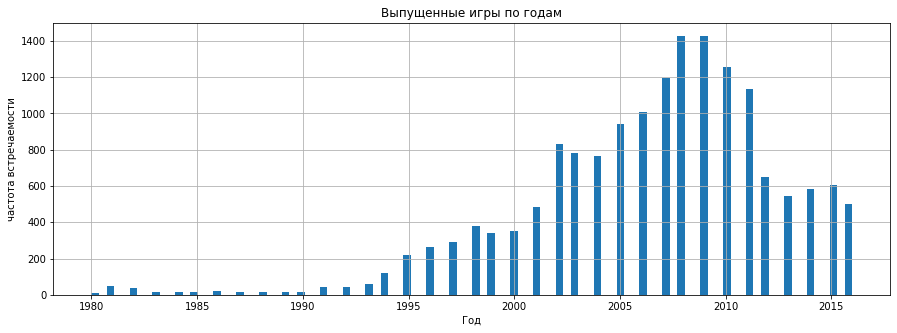

In [61]:
# построим гистограмму 
def draw_hist(dataset, col):
    dataset[col].sort_values(ascending=True).hist(bins=100, figsize=(15,5))
draw_hist(data, 'year_of_release')
plt.title("Выпущенные игры по годам")
plt.xlabel("Год")
plt.ylabel("частота встречаемости")
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший график получился. По нему мы видим то, как ведет себя выпуск платформ с каждым годом. 

Видим интересную динамику - с 1980 по 1995 игр выпускалось не так много, затем с 1995 года по 2010 годы видим хороший рост в количестве выпущенных игр (что логично, учитывая, что индустрия развивается). В 2008 году рост останавливается, в 2009 наблюдаем падение, а затем, начиная с 2011 года, видим сильное падение -  это может быть вызвано повышением требований к качеству выпускаемых игр, устареванием каких-то популярных у пользователей платформ и в большой степени кризисом (2008-2012 гг). К сожалению, мировой кризис не мог не сказаться на продажах игр.   
Обратим внимание, что рост снова начал наблюдаться после 2013 года.   

Также следует учесть, что данные за 2016 год неполные. Количество уже совершённых продаж уменьшиться вряд ли сможет, а вот вырасти - практически наверняка. Можем предположить, что данные за 2016 год будут примерно на уровне 2015 года. 
При работе над прогнозом на 2017 год будем брать данные за 2013-2016 год, чтобы не захватить в расчёт "рухнувшую" из-за кризиса статистику. Итого, **за актуальный период возьмём данные после 2013 года.** 

Изучим поподробнее информацию о платформах

In [62]:
# посмотрим данные в целом 
display(data['platform'].value_counts())
# для удобства анализа продаж по каждой платформе соберём информацию в отдельную таблицу: вынесем в неё 
# имя платформы и суммарные продажи, сразу отсортируем
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
    ascending=False)
display(sales_by_platform)


PS2     2131
DS      2121
PS3     1305
Wii     1286
X360    1233
PSP     1193
PS      1190
PC       958
GBA      811
XB       805
GC       543
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

,total_sales
platform,
PS2,1243.92
X360,961.29
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


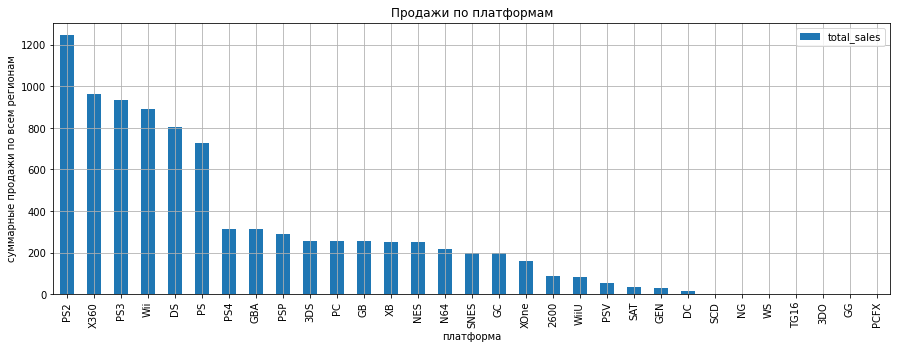

In [63]:
# построим диаграмму для визуализации
sales_by_platform.plot(kind='bar' , grid=True, figsize=(15, 5))
plt.title("Продажи по платформам")
plt.xlabel("платформа")
plt.ylabel("суммарные продажи по всем регионам")
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг по суммарным продажам получен.  

Можем выделить однозначных лидеров - Ps2, X360, Wii, DS и PS. При этом PS2 уверенно держится на первом месте.   
Далее требуется определить срок жизни, за какое время появляются и исчезают платформы. 
Для начала отберём топ 10 платформ 

In [64]:
top_platform = sales_by_platform.sort_values(by='total_sales', ascending=False)[:10].index
display(top_platform)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

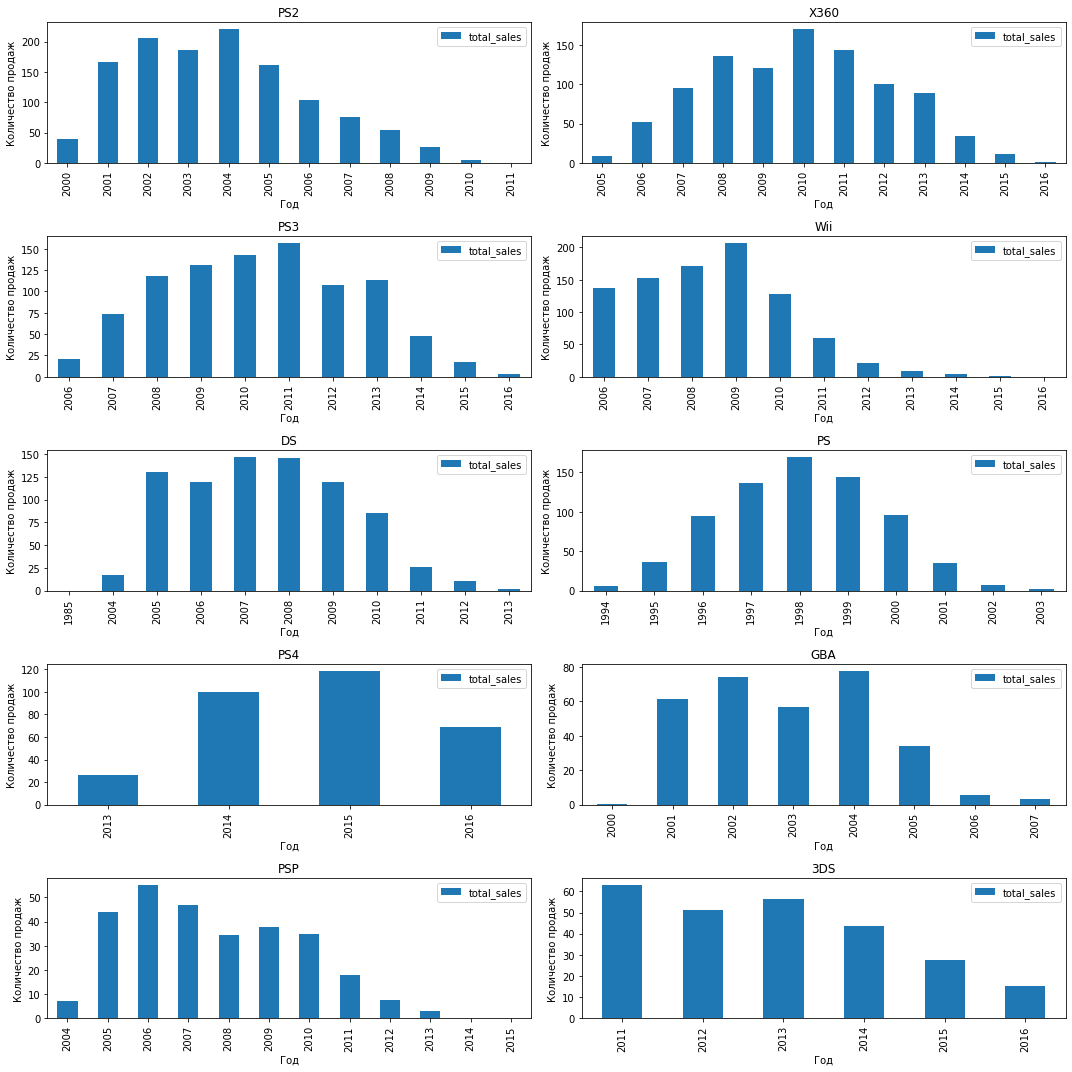

In [65]:
# покажем отдельные графики по каждой платформе 
# поскольку взяли топ 10, графиков много, сделаем вывод их в 2 колонки 
num_plots = len(top_platform)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, platform in enumerate(top_platform):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    platform_data = data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    platform_data.plot(kind='bar', ax=ax)
    ax.set_title(platform)
    ax.set_xlabel("Год")
    ax.set_ylabel("Количество продаж")

# Убрать пустые графики, если они есть
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols][j % num_cols])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отдельно хочу выделить автоматизацию вывода графиков. Получилось отлично. 

Видим следующее: 
- PS2: продажи с 2000 по 2011 годы, пик - в 2001-2005 годах, 
- X360: продажи c 2005 по 2016 год, пик - с 2008 по 2011 
- PS3: 2006-2013 гг, пик - 2008-2012 
- Wii: 2006 - 2016 гг, пик с 2006 по 2010 
- DS: 1985-2013 гг, пие с 2005 по 2009 
- PS: 1994-2003,  пик - 1996-2000
- PS4: 2013-2016, пик - 2014-2016
- GBA: 2000-2007, gbr 2001-2005 годы, 
- PSP: 2004-2015, пик - 2005-2010
- 3DS: 2011-2016, пик 2011-2014

В среднем получаем, что платформа "живёт" в районе 10 лет (некоторые больше, некоторые меньше), наибольшее количество продаж идёт в течение примерно 6-8 лет.   
Аномальными кажутся продажи на DS в 1985 году, проверим эти данные - может, закралась какая-то ошибка. 
   

In [66]:
display(data.query('platform == "DS" and year_of_release < 2004'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,TBD,0.02


Выглядит как ошибка. Тут два основных фактора: 
- согласно википедии, DS была выпущена в 2004 году 
- если это была "пробная" игра для этой платформы, после которой консоль ушла на доработку на почти 20 лет - даже при таком предположении данная строчка скорее искажает данные, чем помогает их проанализировать и сделать выводы.   

Строчка всего одна, поэтому проще всего будет от неё избавиться. 

In [67]:
data = data.drop(index=[15957]).reset_index(drop=True)
display(data.query('platform == "DS" and year_of_release < 2004'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Для более наглядных результатов отобразим ещё все данные на одном графике

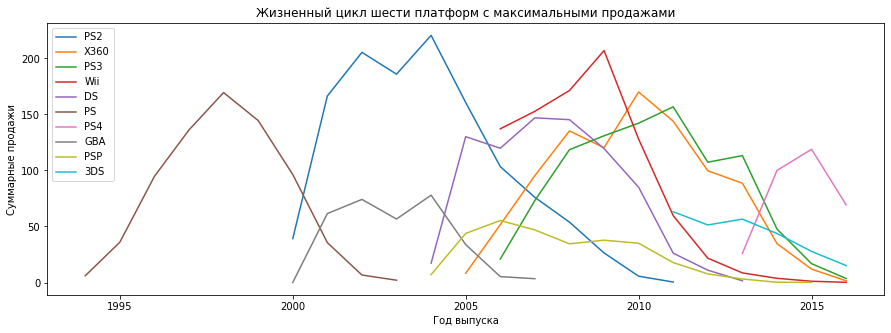

In [68]:
# покажем все данные на одном графике 
# для этого придётся создать новую таблицу, которая будет содержать не только информацию по платформе и 
# всем продажам, но и информацию о годах выпуска 
for platform in top_platform:
    (
    data.query('platform == @platform')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (15, 5), label=platform)
    )
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По графику отчетливо виден цикл жизни плафторм. 

**Промежуточный вывод** по сроку жизни платформ: 
В среднем можно сказать, что срок жизни популярных платформ - около 6-8 лет, более "новые" живут чуть дольше, чем старые. Для разных поколений консолей (например PS, PS2, PS3, PS4) новое поколение выходит примерно на спадении пика популярности предыдущего: это довольно логично и в целом очень жизненно, в реальности так и происходит. 

За актуальный период возьмём данные с 2013 года, потому что 
- это в целом дата выхода и начало развития актуальных на анализируемый период поколений устройств 
- данные за 2013 год меньше зависят от кризиса 2008-2012 года, который очень сильно повлиял на продажи. 

Перейдём далее к обработке данных за выбранный актуальный период.    
В первую очередь, разберёмся, какие платформы лидируют по продажам, растут или падают, и выберем несколько потенциально прибыльных платформ.

In [69]:
# отрежем актуальные данные 
actual_data = data.query('year_of_release >= 2013')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 16 to 16450
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2234 non-null   object 
 1   platform         2234 non-null   object 
 2   year_of_release  2234 non-null   Int64  
 3   genre            2234 non-null   object 
 4   na_sales         2234 non-null   float64
 5   eu_sales         2234 non-null   float64
 6   jp_sales         2234 non-null   float64
 7   other_sales      2234 non-null   float64
 8   critic_score     2234 non-null   float64
 9   user_score       2234 non-null   float64
 10  rating           2234 non-null   object 
 11  total_sales      2234 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.1+ KB


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С актуальным периодом согласен. Нам незачем обращать внимание на старые данные. 

Далее будем работать с актуальными данными - actual_data. Снова построим таблицу по продажам, но уже для "акутальных" данных. 

In [70]:
actual_sales = (
    actual_data.pivot_table(
        index='platform',
        columns='year_of_release',
        values='total_sales',
        aggfunc='sum',
        fill_value=0)
)
# для красоты и простоты отслеживания динамики добавим отображение максимального и минимального значения цветом
display(actual_sales
    .style
    .highlight_max(color='lightgreen', axis=1).highlight_min(color='pink', axis=1))

# а ещё посчитаем полную сумму за весь период 
display(actual_sales.sum(axis=1).sort_values(ascending = False))

# добавим сумму в таблицу
actual_sales['total'] = actual_sales.sum(axis=1)

display(actual_sales.sort_values(by = 'total', ascending = False)
    .style
    .highlight_min(color='pink', axis=1))




year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.570000,43.760000,27.780000,15.140000
DS,1.540000,0.000000,0.000000,0.000000
PC,12.730000,13.280000,8.520000,5.250000
PS3,113.250000,47.760000,16.820000,3.600000
PS4,25.990000,100.000000,118.900000,69.250000
PSP,3.140000,0.240000,0.120000,0.000000
PSV,10.590000,11.900000,6.250000,4.250000
Wii,8.590000,3.750000,1.140000,0.180000
WiiU,21.650000,22.030000,16.350000,4.600000


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.78
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
dtype: float64

year_of_release,2013,2014,2015,2016,total
platform,,,,,
PS4,25.990000,100.000000,118.900000,69.250000,314.140000
PS3,113.250000,47.760000,16.820000,3.600000,181.430000
XOne,18.960000,54.070000,60.140000,26.150000,159.320000
3DS,56.570000,43.760000,27.780000,15.140000,143.250000
X360,88.580000,34.740000,11.960000,1.520000,136.800000
WiiU,21.650000,22.030000,16.350000,4.600000,64.630000
PC,12.730000,13.280000,8.520000,5.250000,39.780000
PSV,10.590000,11.900000,6.250000,4.250000,32.990000
Wii,8.590000,3.750000,1.140000,0.180000,13.660000


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А тут можно было вывести еще график за актуальный период для наглядности 

Топ-10 почти не изменился: 
- "пробились" в топ после изменения периода анализируемых данных 
    - PC 
    - PSV
    - WiiU
    - XOne
- ушли из топа
    - PS2
    - PS 1 поколения
    - GBA
    - DS (тут после 2013 года вообще нет продаж)

Учитывая, что данные за 2016 год могут быть неполными, видим, что однозначно растут по продажам PS4 и XOne. По этим платформам и в "неполном" 2016 году продажи лучше, чем у остальных - это однозначные лидеры.   
*В целом, правильность выбора этих платформ как перспективных подтверждается реальностью, в 2017 году они действительно были очень популярны, и студии выпускали ещё достаточно много эксклюзивов для этих платформ*. 
Устаревающие платформы - PS3 (на смену которой и пришла PS4), X360, 3DS, WiiU точно не стоит рассматривать как перспективные, поскольку им на смену пришли новые поколения.  
Примечательно, что ПК хоть и не растёт в продажах, но и не падает критично - всё же для ПК выходят и новые игры, и всегда есть место ностальгирующим игрокам. 

**Промежуточный вывод**: перспективными считаем платформы PS4 и XOne.
Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам.

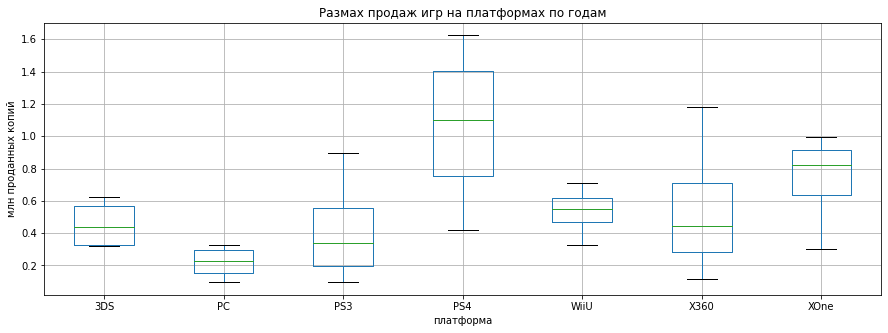

In [71]:
# строим по нашей новой таблице, где отрезаны данные за актуальный период и данные 
# агрегированы по годам 
# по платформам - выбрали топ 7 из топа, полученного на предыдущем шаге
(
    actual_data.query('platform in ("PS4","PS3","XOne","3DS","X360","WiiU","PC")').pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales')
    .boxplot(figsize=(15, 5))
)
plt.title('Размах продаж игр на платформах по годам')
plt.xlabel('платформа')
plt.ylabel('млн проданных копий')
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А вот здесь правильнее будет оставить штук 5 наиболее перспективных платформ актуального периода. А еще тут надо построить этот график без предварительной агрегации по суммер. 

<div class="alert alert-block alert-info">
 
### Комментарий студента

Спасибо за поправку! Удалила агрегацию, выделила топ 7 (5 субьективно некрасиво смотрятся :)) 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово вышло в данном случае 

По графику и, в частности, по медианным значениям, наглядно видим следующее: 
- PS4 значительно опережает своего предшественника PS3
- XOne тоже "борется" с предыдущей версией и обгоняет его, хоть разница не так значительна, как для PS 
- за наш период 3DS выглядит конкурентоспособным, хотя если посмотреть на динамику, видим, что продажи падают. 
**вывод**: По медианным значениям видим, что наши "лидеры" - перспективные платформы - уже значительно опережают своих предшественников, косвенно подтвердили правильность выбора перспективных платформ для дальнейшего исследования и прогнозов.

Изучим влияние отзывов на продажи на примере одной платформы. Для анализа выберем PS4 - и из-за того, что она в нашей выборке самая популярная, и из персонального интереса к этой платформе. 
Построим диаграмму рассеяния и изучим корреляцию отзывов (критиков и пользователей) и продаж

In [72]:
# проверим, есть ли смысл рассматривать корреляцию по всему периоду и отдельно только по актуальному
display(data.query('platform == "PS4"'))
display(actual_data.query('platform == "PS4"'))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,TBD,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,TBD,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16237,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,TBD,0.01
16240,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,TBD,0.01
16262,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16266,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,TBD,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,TBD,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16237,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,TBD,0.01
16240,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,TBD,0.01
16262,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16266,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Можно смотреть данные за весь период: продаж по PS4 до 2013 года не было (что логично, ведь она ещё не вышла). 

Не забудем указать важный момент: в рамках работы с пропусками мы проставляли -1 вместо пустых значений в оценках. Эти оценки учитывать не будем - отфильтруем данные, убрав из выборки оценки с значением -1.

In [73]:
# вынесем данные по выбранной платформе в отдельную таблицу
data_ps4 = data.query('platform == "PS4" and critic_score > -1 and user_score > -1')
# матрица корреляции по всем данным
corr_matrix = data_ps4[['critic_score', 'user_score', 'total_sales']].corr()
corr_matrix

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший метод для нахождения зависимости между параметрами

In [74]:
# а ещё посмотрим топ 20 игр для плойки 
display(data_ps4.head(20).sort_values(by='total_sales', ascending = False))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47


Наблюдаем следующее: 
- есть умеренная корреляция отзывов критиков и продаж 
- очень слабая корреляция пользовательских рейтингов и продаж 

То есть отзывы пользователей фактически никакой связи с продажами не имеют.
Построим диаграммы рассеяния для PS4 

Text(0.5, 1.0, 'Корреляция между оценками пользователей и продажами')

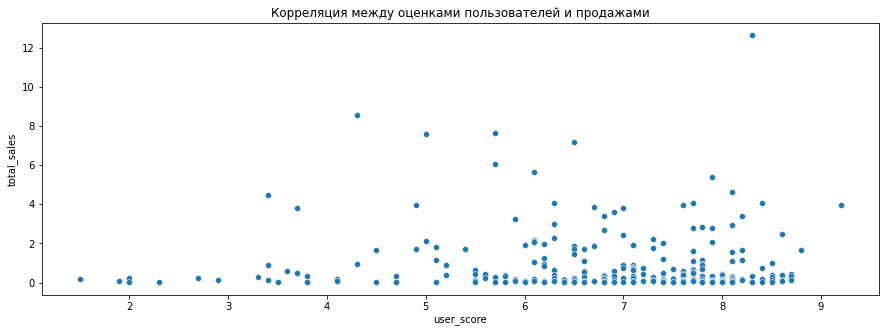

In [75]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='user_score', y='total_sales', data=data_ps4)
plt.title('Корреляция между оценками пользователей и продажами')



Text(0.5, 1.0, 'Корреляция между оценками критиков и продажами')

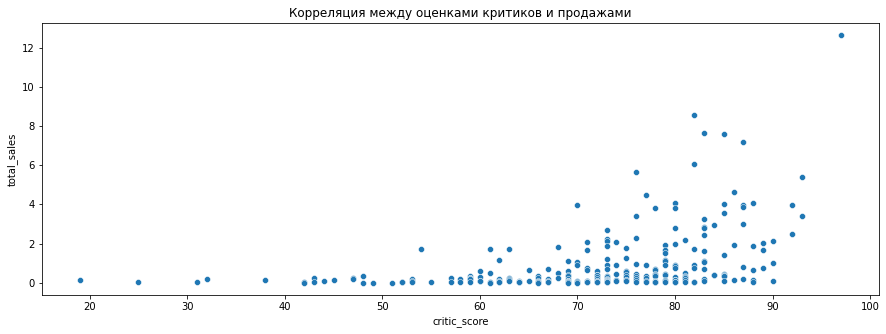

In [76]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='critic_score', y='total_sales', data=data_ps4)
plt.title('Корреляция между оценками критиков и продажами')



<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По графику тут хорошо можно определить о зависимости цены от оценок. 

На основе данных по PS4 можем сделать вывод, что общие продажи умеренно коррелируют с оценкой критиков и в целом не имеют никакой связи с оценкой пользователей. (Кстати, наглядное тому подтверждение - FIFA c большим количеством продаж и относительно низкими оценками пользователей). 

Проверим этот вывод на примере других платформ. Учитывая, что оценок критиков у нас в данных не так уж много, посмотрим, по каким платформам их больше, чтобы по анализируемой платформе было достаточное количество данных. 

In [77]:
display(actual_data.query('critic_score > -1 and user_score > -1').groupby('platform')['critic_score'].count().sort_values(ascending=False))

platform
PS4     249
XOne    165
PC      149
PS3     120
X360     81
PSV      76
WiiU     69
3DS      67
PSP       1
Name: critic_score, dtype: int64

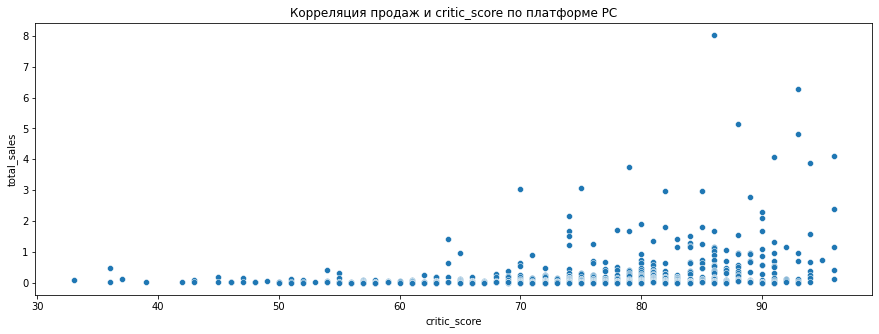

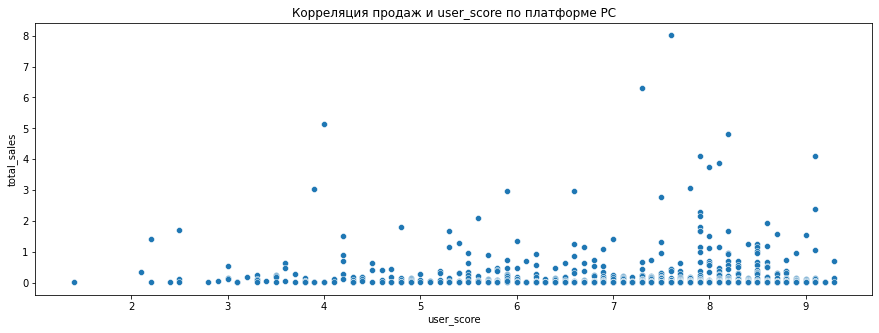

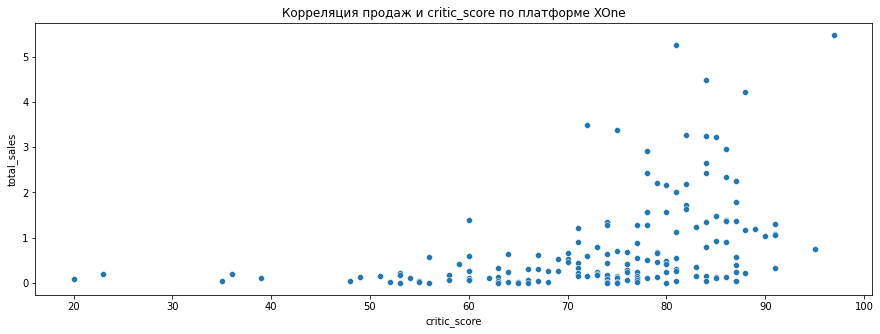

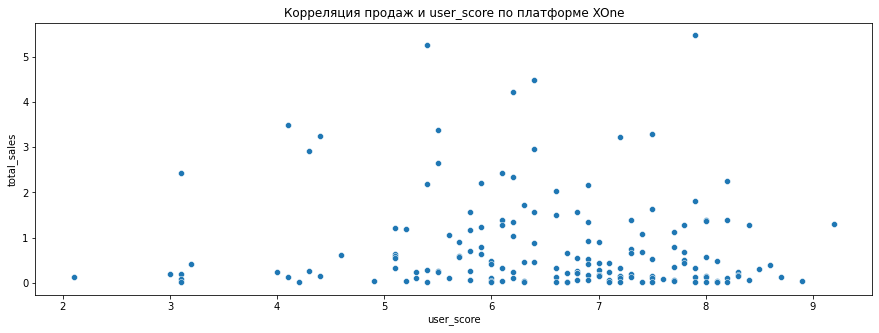

In [78]:
def create_matrix(platform, criteria):
    plt.figure(figsize=(15,5))
    filtered_data = data[data['platform'] == platform].query('critic_score > -1 and user_score > -1')
    sns.scatterplot(x=criteria, y='total_sales', data=filtered_data)
    plt.title('Корреляция продаж и ' + criteria + ' по платформе ' + platform)
create_matrix('PC', 'critic_score')
create_matrix('PC', 'user_score')
create_matrix('XOne', 'critic_score')
create_matrix('XOne', 'user_score')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По графику тут хорошо можно определить о зависимости цены от оценок. 

Построили диаграммы для платформ с наибольшим количеством "честных" оценок, видим, что вывод по PS4 подтверждается и для них - продажи немного коррелируют с оценкой критиков и по сути не имеют корреляции с оценками пользователей.
Посмотрим на корреляцию, не забыв исключить технические оценки "-1". 

Тоже создадим функцию, которая будет принимать на вход название платформы и выдавать матрицу корреляции. Покрасим её для наглядности и применим функцию к рассмотренным выше платформам - PS3, PC, PSV

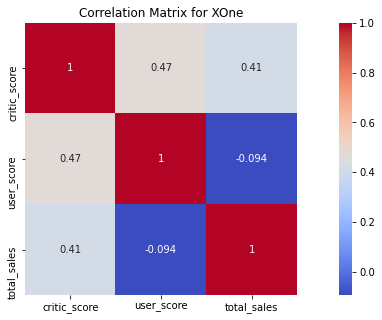

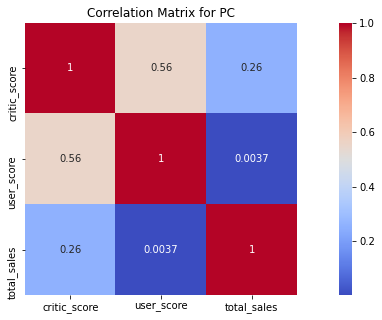

In [79]:
def create_matrix(platform):
    # Фильтрация данных по платформе и указанных пользователем критериям
    data_filtered = data.query('platform == @platform and user_score > -1 and critic_score > -1')
        # Вычисление матрицы корреляций
    corr_matrix = data_filtered[['critic_score', 'user_score', 'total_sales']].corr()
     # Создание заголовка для матрицы корреляций
    title = f'Correlation Matrix for {platform}'  
    # Построение матрицы корреляций с заголовком
    plt.figure(figsize=(15, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
    plt.title(title)
    plt.show()
create_matrix('XOne')
create_matrix('PC')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы на основе данных нескольких платформ выглядят убедительнее

**Вывод**: на примере платформ PC и XOne подтвердили вывод, сделанный для PS4: 
- корреляция продаж с оценкой критиков умеренная или слабая
- корреляция продаж с оценкой пользователей практически отсутствует. 

Прежде, чем перейти к проверке гипотез, изучим распределение игр по жанрам, попробуем выделить самые прибыльные жанры и понять, выделяются ли жанры с самыми высокими и низкими продажами 

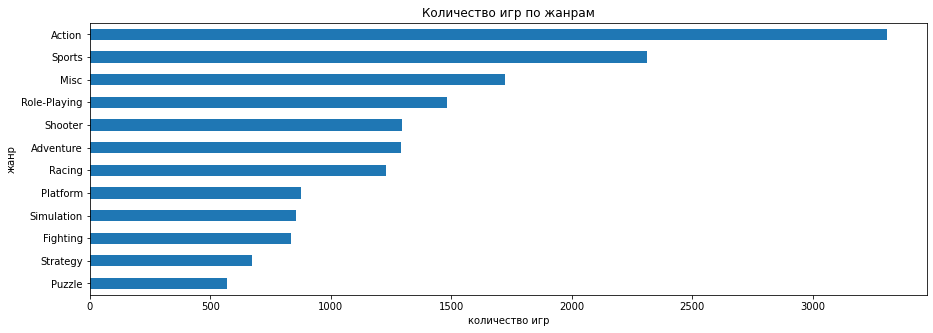

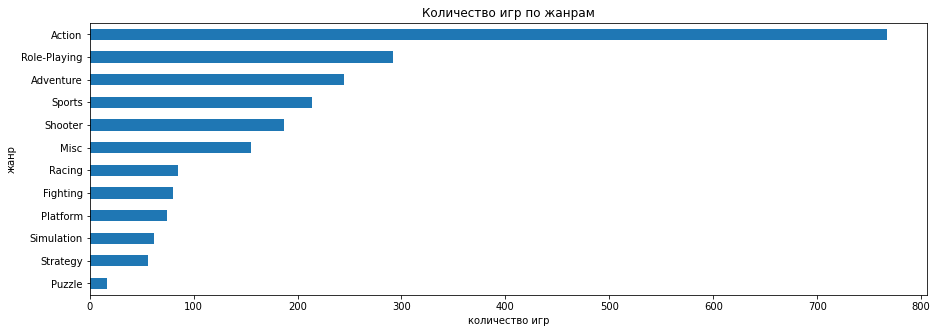

In [80]:
# сразу построим диаграмму по жанрам 
# Количество игр по жанрам
(
    data.groupby('genre')['name']
    .count()
    .sort_values(ascending=True)
    .plot(kind='barh', x='genre', figsize=(15, 5))
)
plt.title('Количество игр по жанрам')
plt.xlabel('количество игр')
plt.ylabel('жанр')
plt.show()
# и сделаем то же самое по данным за актуальный период 
(
    actual_data.groupby('genre')['name']
    .count()
    .sort_values(ascending=True)
    .plot(kind='barh', x='genre', figsize=(15, 5))
)
plt.title('Количество игр по жанрам')
plt.xlabel('количество игр')
plt.ylabel('жанр')
plt.show()

Очевидный чемпион по количеству выпущенных игр - Экшн. Причём в актуальном периоде отрыв игр в жанре Экшн от остальных только увеличился. 
Но количество не всегда будет значить продажи и прибыльность, поищем всё же самый прибыльный жанр. 

,genre,total_sales
0,Action,322.22
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Text(0, 0.5, 'Продажи')

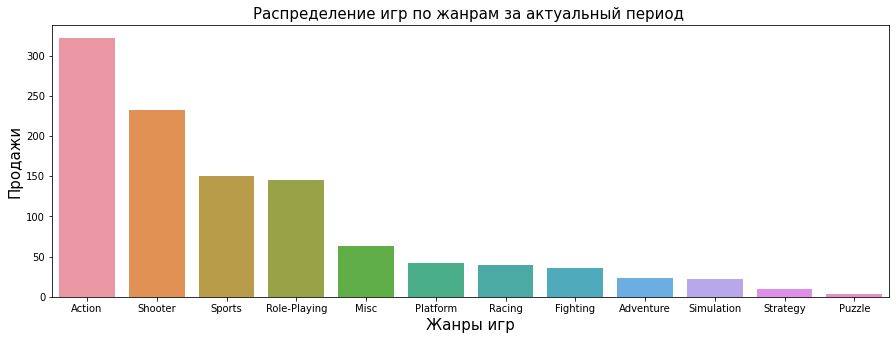

In [81]:
actual_genre_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
display(actual_genre_sales)
plt.figure(figsize=(15,5))
plt.title('Распределение игр по жанрам за актуальный период ',fontsize=15)
sns.barplot(data=actual_genre_sales, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=15)
plt.ylabel('Продажи',fontsize=15)

,genre,total_sales
0,Action,1716.85
1,Sports,1320.04
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,724.76
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


Text(0, 0.5, 'Продажи')

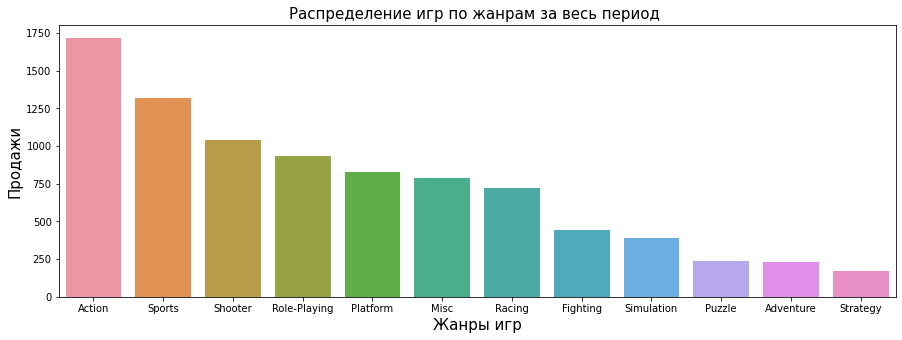

In [82]:
# сделаем то же самое за весь период 
genre_sales = data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
display(genre_sales)
plt.figure(figsize=(15,5))
plt.title('Распределение игр по жанрам за весь период ',fontsize=15)
sns.barplot(data=genre_sales, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=15)
plt.ylabel('Продажи',fontsize=15)

Получаем, что экшн продавался больше всего - как за актуальный период, так и в целом. Построим ещё диаграмму размаха, чтобы обнаружить выбросы и более точно оценить продажи. 

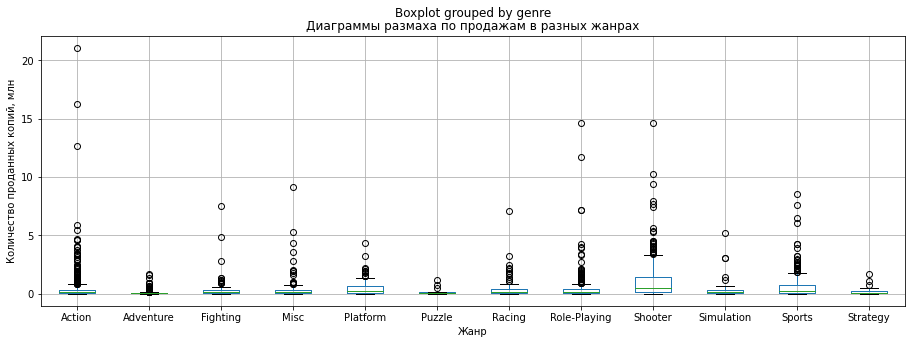

In [83]:
 (actual_data[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15,5))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Правильно делаешь, что рассматриваешь медианные показатели. Это наиболее справедливая величина для определения самого успешного жанра. 

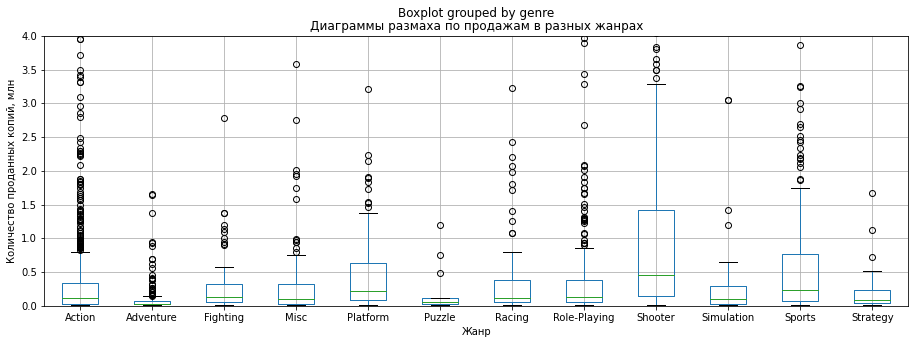

In [84]:
# а теперь строим без выбросов 
(actual_data[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(15,5))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.show()

Похоже, если исключить выбросы, более стабильными кажутся жанры Шутер и Спорт, а Экшн со своим невероятным количеством выбросов уходит на третий план. 
В целом жанр Шутер и Спорт показывают хорошую динамику. Если мы не рассчитываем на бестселлеры в жанре Экшн, более перспективными назовём Шутер и Спорт. 

Для завершения этапа немного посмотрим на бестселлеры, которые выглядят как выбросы. 

In [85]:
display(actual_data.query('total_sales > 4').sort_values(by='total_sales', ascending = False))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,TBD,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,TBD,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,TBD,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-1.0,-1.0,TBD,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Топ игр для покупателей магазина Стримчик понятен - это call of duty и  GTA, что в целом объяснимо. 

**Вывод** - наиболее перспективный жанр - шутеры и спорт. Не смотря на то, что у игр в жанре Экшн больше продаж в целом, они больше зависят от "выстреливающих" бестселлеров. Если ориентироваться на медианные продажи - шутеры самые перспективные. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично вышло. Даже нечего добавить

**Общий вывод по разделу**   

Провели исследовательский анализ данных, выявили следующее: 
- Изучили продажи за разные годы. 
- Средний срок жизни платформы - 5-8 лет. Более новые платформы "живут" чуть дольше, наблюдается небольшой рост "срока жизни" платформ. Новые поколения платформ приходят на смену старым примерно на спаде пика популярности "старых" поколений 
- Актуальный период для анализа - с 2013 года. Этот период не так сильно подвержен влиянию кризиса, и к тому же, связан с актуальными на 2017 - год, для которого мы хотим построить прогноз - поколениями платформ. 
- Потенциально прибыльными платформами признаём PS4 и XOne. Это платформы нового поколения, которые показывают хорошую динамику продаж 
- По "ящику с усами" проанализировали продажи и сделали вывод, что по медианным значениям видим, что наши "лидеры" - перспективные платформы - уже значительно опережают своих предшественников, косвенно подтвердили правильность выбора перспективных платформ для дальнейшего исследования и прогнозов.
- Построили графики и убедились, что продажи коррелируют с отзывами критиков, но не имеют связи с рейтингом пользователей. Пользователи ставят низкие оценки FIFA и Call of Duty, но продолжают покупать 
- Самый прибыльный жанр - Экшн, по нему больше всего продаж - как суммарно, так и за актуальный период. Однако самые перспективные данры - Шутер и Спорт - они показывают себя более "стабильно", медианные продажи по ним гораздо выше. По сути они не зависят от бестселлеров, а делают выручку без них. 

### Шаг 4. Портрет пользователя по регионам 
В рамках данного шага 
- определим топ-5 платформ для каждого региона 
- определим топ-5 жанров по каждому региону 
- изучим корреляцию рейтинга и продаж в каждом регионе по отдельности. 

Начнём с топ платформ для каждого региона 

нам предстоит построить довольно много графиков по "топам", поэтому сразу определим функцию для удобства 

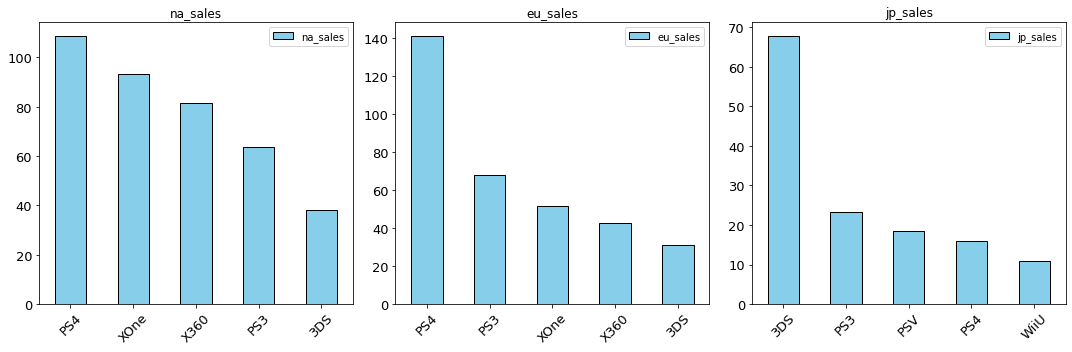

In [86]:
def define_top(column):
    # Создадим общий список по продажам
    region_list = ['na_sales', 'eu_sales', 'jp_sales']
    
    # Подготовим подграфики
    fig, axes = plt.subplots(1, len(region_list), figsize=(15, 5))
    
    # Пройдемся циклом по регионам и построим графики для них
    for i, region in enumerate(region_list):
        # в таблицу сохраняю сумму продаж по конкретному параметру для актуального в текущей итерации цикла региону
        data_new = actual_data.pivot_table(index=column, values=region, aggfunc='sum').sort_values(by=region, ascending=False)[:5]
        data_new.plot(kind='bar', ec='black', title=region, ax=axes[i], fontsize=13, color='skyblue', rot=45)
        axes[i].set_xlabel('')
        #display(data_new)
    
    plt.tight_layout()
    plt.show()

# Вызываю функцию для платформы 
define_top('platform')

Видим следующее: 
- в Северной Америке и Европе однозначный лидер - свежая PS4, тогда как в Японии PS4 даже не в топ-3, в Японии лидирует 3DS (nintendo switch). Это может быть вызвано ритмом жизни и привычками играть "на ходу", нон-стоп в данном регионе. 
- до Северной Америки быстрее добрался (и распространился) XOne. В Европе же на втором месте пока ещё располагается "ветеран", PS3. 
- в целом PS4 неплохо себя показывает во всех регионах. 

Разберёмся с топом по жанрам

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичное представление о регионах получено

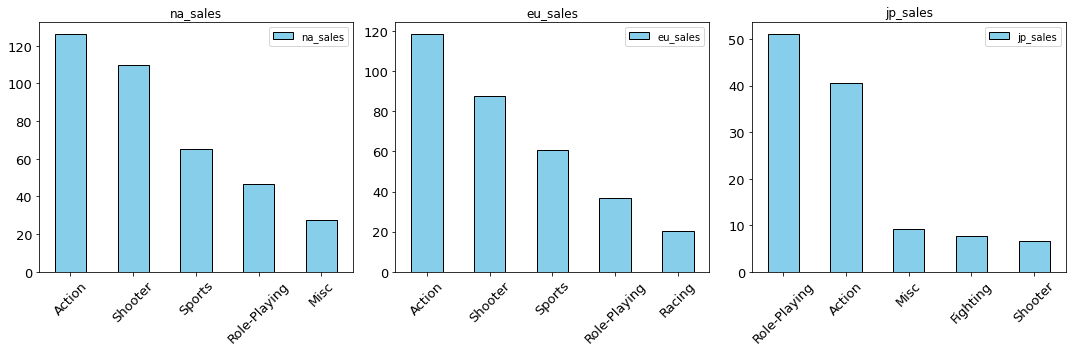

In [87]:
define_top('genre')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут мы отчетливо видим, что Япония получилась наиболее уникальной среди регионов. 

Японцы снова выделяются - в Северной Америке и Европе Экшн вышел на первое место, в Японии же на первом месте разместились ролевые игры.

In [88]:
# посмотрим, что же это за игры, пользующиеся такой бещеной популярностью в Японии
display(actual_data.query('genre == "Role-Playing"').sort_values(by = 'jp_sales', ascending = False).head(10))

# посмотрим топ по Японии в целом 
display(actual_data.sort_values(by = 'jp_sales', ascending = False).head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,TBD,14.60
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,-1.0,-1.0,TBD,3.44
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,-1.0,-1.0,TBD,3.28
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,TBD,11.68
561,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,-1.0,-1.0,TBD,2.68
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1.0,-1.0,TBD,7.14
1233,Puzzle & Dragons,3DS,2013,Role-Playing,0.00,0.00,1.51,0.00,-1.0,-1.0,TBD,1.51
790,Yokai Watch,3DS,2013,Role-Playing,0.25,0.45,1.33,0.05,-1.0,-1.0,TBD,2.08
1290,Dragon Quest VII: Warriors of Eden,3DS,2013,Role-Playing,0.06,0.09,1.30,0.01,-1.0,-1.0,TBD,1.46


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,TBD,14.60
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,-1.0,-1.0,TBD,3.44
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,-1.0,-1.0,TBD,3.28
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,TBD,11.68
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,-1.0,-1.0,TBD,3.32
561,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,-1.0,-1.0,TBD,2.68
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,TBD,7.55
687,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,-1.0,-1.0,TBD,2.29
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1.0,-1.0,TBD,7.14


Итого, в Северной Америке и Европе наибольшей популярностью пользуются игры в жанре Экшн, а также довольно популярны шутеры и спорт. Японцы же в наибольшей степени увлекаются играми в жанре ROle-Playing, в частности, бешеной популярностью пользуются покемоны. Скорее всего, такие различия вызваны в том числе привычным ритмом жизни и культурными различиями - в Японии действительно многие играют "на ходу". 

Изучим влияние рейтинга на продажи

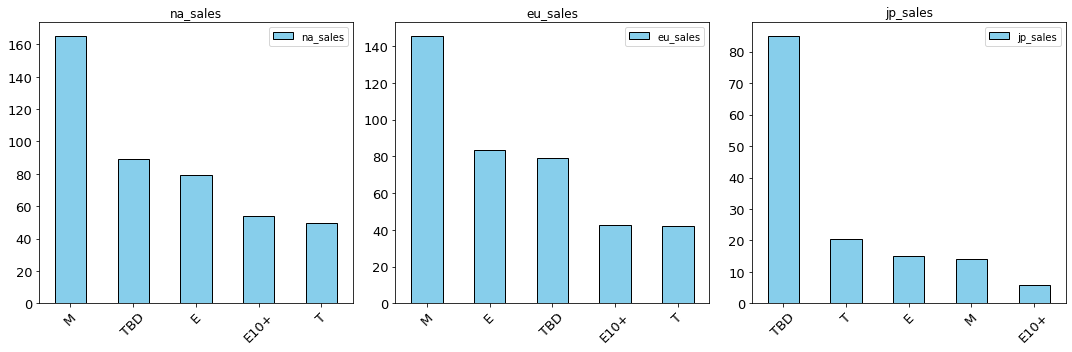

In [89]:
define_top('rating')

В Северной Америке и Европе наибольшей популярностью пользуются игры для взрослых. В Японии абсолютное большинство играет в игры без рейтинга (в частности, мы посмотрели топ игр по продажам в Японии - почти у всех наиболее популярных игр рейтинга нет). 

**Общий вывод по шагу**: 
- В Северной Америке пользователи играют преимущественно на PS4 или - с меньшей вероятностью - XOne,  самые любимые игры - Экшн, Шутер и спорт, и как правило, это игры для взрослых 
- в Евроме пользователи играют на PS4 или - реже - на PS3, XOne пока не так популярен. Играют в Экшн игры, а также в шутеры и спортивные игры. Как правило, это игры для взрослых 
- Японцы чаще выбирают портативную 3DS и играют в игры в жанре Role-Play без рейтинга. Остальные платформы и жанры у них тоже присутствуют, но пользуются меньшей популярностью.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рассмотрев каждый из регионов мы пришли к выводу, что они имеют свою специфику. 

### Шаг 5. Проверка гипотез 
В рамках данного шага проверим гипотезы по продажам:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Начнём с первой гипотезы

Проверяем следующую гипотезу: 
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". 

Сформулируем нулевую и альтернативную гипотезы. В качестве нулевой гипотезы правильнее будет взять равенство, альтернативной - неравенство. Получаем:   
H0: Средний пользовательский рейтинг по Xbox One **равен** среднему пользовательскому рейтингу по PC   
H1: Средний пользовательский рейтинг по Xbox One **не равен** среднему пользовательскому рейтингу по PC 



In [90]:
# для начала посчитаем эти средние пользовательские рейтинги для платформ Xone и PC 
xone_rating = actual_data.query('platform == "XOne"')['user_score']
pc_rating = actual_data.query('platform == "PC"')['user_score']

#Выведем средний рейтинг
print('Медианный рейтинг пользователей для XBoxOne', xone_rating.mean())
print('Медианный рейтинг пользователей для PC', pc_rating.mean())

Медианный рейтинг пользователей для XBoxOne 4.542105263157895
Медианный рейтинг пользователей для PC 4.980526315789473


In [91]:
alpha = 0.05

results = st.ttest_ind(xone_rating.dropna(), pc_rating.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.17611040432542738
Не получилось отвергнуть нулевую гипотезу


При уровне статистической значимости 0.05 нулевую гипотезу опровергнуть не получилось. Средние рейтинги действительно довольно-таки близки. 

Таким образом, не можем опровергнуть гипотезу о равенстве среднего рейтинга пользователей для платформ XOne и PC. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы и верно определен метод проверки. С выводами согласен. 

Проверяем следующую гипотезу:   
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы. В качестве нулевой гипотезы берём равенство, и таким образом получаем: 

H0: Средний пользовательский рейтинг по жанру Action **равен** среднему пользовательскому рейтингу по жанру Sports.   
H1: Средний пользовательский рейтинг по жанру Action **не равен** среднему пользовательскому рейтингу по жанру Sports. 


Персональный опыт и данные по топам игр из нашей выборки, которые мы просматривали раньше, подсказывают, что стоит ожидать неравенства средних. Проверим это математически. 
Выделим средний рейтинг по жанрам в нашей выборке и проверим гипотезы через p-value. 

In [92]:
action_rating = actual_data.query('genre == "Action"')['user_score']
sports_rating = actual_data.query('genre == "Sports"')['user_score']

print('Медианный рейтинг пользователей для Action', action_rating.mean())
print('Медианный рейтинг пользователей для Sports', sports_rating.mean())

Медианный рейтинг пользователей для Action 2.98735332464146
Медианный рейтинг пользователей для Sports 3.6640186915887845


In [93]:
#проверяем гипотезы
alpha = 0.01

# выкинем ешё пустые значения, чтобы они не портили картину, с dropna
results = st.ttest_ind(action_rating.dropna(), sports_rating.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.009152847746143628
Отвергаем нулевую гипотезу


При таком маленьком p-value нулевую гипотезу отвергаем. 
Итого, получаем следующий вывод: Гипотезу о равенстве рейтингов для жанров Экшн и Спорт можно опровергнуть. Пользовательские рейтинги для данных жанров не равны. 

**Общий вывод по разделу**: Проверили гипотезы, пришли к следующим выводам: 
- гипотещу о равенстве средних пользовательских рейтингов для платформ XOne и ПК опровергнуть нельзя; рейтинги очень блики 
- гипотезу о равенстве средних пользовательских рейтингов для жанров Экшн и Спорт опровергли - средние рейтинги не равны (и далеки от равенства). 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Аналогично вышло

### Общий вывод 
В рамках данного проекта собрали и проанализировали данные магазина видеоигр для выбора перспективной платформы и успешных жанров видеоигр. Проверили гипотезы по пользовательским оценкам игр на разных платформах и в разных жанрах. 
- Обработали датасе, переименовав столбцы и приведя их к более удобному формату
- избавились от пропусков 
- посчитали суммарные продажи по играм для всех регионов 
- изучили продажи игр за разные годы
- изучили срок жизни платформ и увидели, как новые поколения консолей приходят на смену старым. 
- нашли интересную игру 1985 года, выпущенную для консоли, которой тогда ещё не существовало, избавились от этих данных как мешающих анализу, но в целом было бы интересно узнать, как эта запись попала в наш датасет;
- определили актуальный период, данные за который будут наиболее значимы для анализа и построения прогнозов на 2017 год 
- увидели однозначный рост популярности платформ PS4 и XOne. Выделили эти платформы как потенциально прибыльные 
- увидели, что рейтинг критиков гораздо больше связан с продажами: есть умеренная корреляция между этими величинами, тогда как от пользовательского рейтинга практически ничего не зависит. Люди ставят "двойки" FIFA и продолжают в неё играть, и это в целом нормально 
- увидели интересную динамику по жанрам: игр в жанре Экшн продано больше всего, однако, этот успех вызван продажами бестселлеров, тогда как наибольшую стабильность показывают игры в жанре Шутер и Спорт. Эти жанры показывают стабильно хорошие результаты, и медианные значения продаж у них в топе. 
- составили портрет типичного пользователя для каждого региона, заметили, что в Японии предпочтения игроков сильно отличаются от Северной Америки и Европы 
- Проверили гипотезы и выявили, что отвергнуть гипотезу о равенстве средних пользовательских рейтингов по платформам XOne и PC нельзя, а гипотезу о равенстве средних пользовательских рейтингов по жанром Экшн и Спорт отвергли. 

В 2017 году будем ожидать высоких продаж по платформе PS4 и жанрам Шутер, Спорт и Экшн. Магазин Стримчик точно будет держаться на плаву. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод стал отличным дополнением к проекту. С такими данными мы точно сможем составить прогноз продаж на 2017 год. Я уверен, нам хватит для этого данных. 

<div class="alert alert-block alert-info">
 
### Итоговый Комментарий ревьюера
    
#### Успех
    
Благодарю тебя за выполнение работы. Мне понравился твой проект за структурность и последовательность. Во многих местах ты подбираешь оптимальный код и автоматизируешь свою работу, а это очень пригодится в будущем. Выделить бы хотел Предобработку данных. На мой взгляд она получилась особенно удачно. Очень насыщенный итоговый вывод вышел. Старайся такие выводы делать и в будущем. 
    
    
Однако, в проекте есть одно важное замечание, которое надо исправить:

* Ящик с усами доработать. 
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-info">

**Комментарий студента**


Спасибо за проверку! Замечания учту в следующем проекте, boxplot поправила 
</div>

<div class="alert alert-block alert-success">
 
### Итоговый Комментарий ревьюера ver.2
    
#### Успех

Спасибо тебе большое за доработку проекта. А вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнейшей учебе. Ты точно справишься и дальше, я уверен в этом. 